In [36]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# Load the diabetes dataset.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Select only one feature (BMI) and make into a 2-D array. The index of BMI feature is 2.
diabetes_X_new = diabetes_X[:, np.newaxis, 2]  
# np.newaxis : 차원 추가해줌
# ex) x1 = np.array([1, 2, 3, 4, 5])
# np.shape(x1) == (5,)
# x1[:, np.newaxis] == [[1],[2],[3],[4],[5]], then shape is (5,1)
# x1[np.newaxis , :] == [[1,2,3,4,5]], then shape is (1,5)


# Separate training data from test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)




X_train shape:  (397, 1)


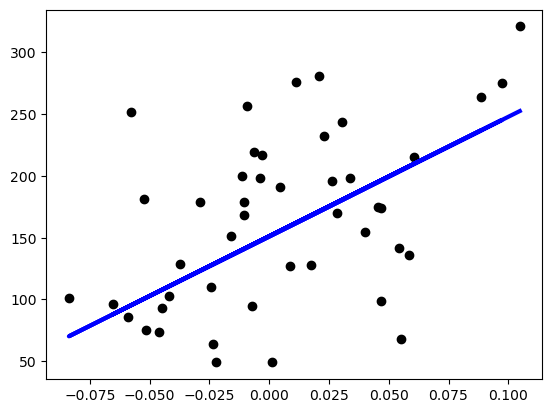

In [25]:
# Linear Regression with sklearn
regr = LinearRegression() # linear regression: 모든 점과 직선 사이의 거리를 구해서 거리의 총합이 가장 작은 직선을 찾는다. => 선형적인 추세 파악 
regr.fit(X_train, y_train) # train 데이터로 모델 학습

# Let's make predictions with test data.
y_pred = regr.predict(X_test) # 

# Compare the real data with our prediction.
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)
plt.show()

In [26]:
# Trained weights with sklearn
regr.coef_, regr.intercept_ #coef = w, intercept = b

(array([966.7269242]), 151.20933147606175)

In [27]:
# Training data for your Linear regression algorithm
X_train = X_train[:,0]  # Matrix (397,1) => Vector (397,)
X_test = X_test[:,0]


In [28]:
X_train.shape, y_train.shape

((397,), (397,))

# Todo: Implement the Gradient Descent Algorithm for Linear Regression


In [29]:
# Train W and b using the training data only
# Use X_train and y_train only

W = np.random.rand()        # Initialization of W
b = np.random.rand()        # Initialization of b

epochs = 25000              # number of epochs
n = float(len(X_train))     # number of training samples
lr = 0.1                    # learning rate

train_loss = []

for k in range(epochs):
  y_pred = W * X_train + b
  diff = y_pred - y_train
  loss = (1/n) * np.sum(np.square(diff)) # L2 loss
  train_loss.append(loss)

  dw = (2/n)*np.sum(X_train * diff)  # dw = 2Σ (Xi(WXi+b-yi))
  db = (2/n)*np.sum(diff) # dy = Σ(WXi+b-yi)

  W = W - lr*dw # weight 업데이트
  b = b - lr*db # bias 업데이트



In [30]:
print("Trained parameters")
print("W:", W,", b:", b)

Trained parameters
W: 966.7169376307208 , b: 151.20932680488175


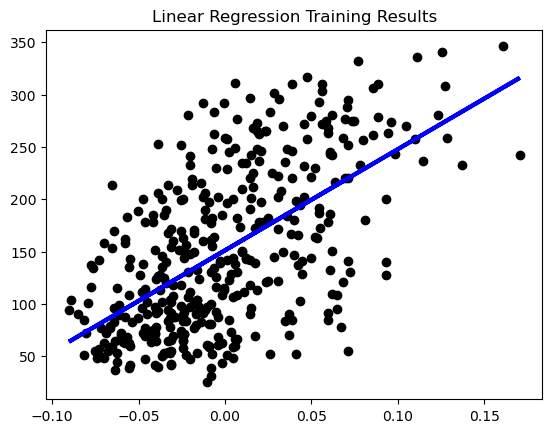

In [31]:
# Checking for traing: Using training data
# use X_train and y_train

y_pred = W*X_train + b
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train,y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Training Results")
plt.show()

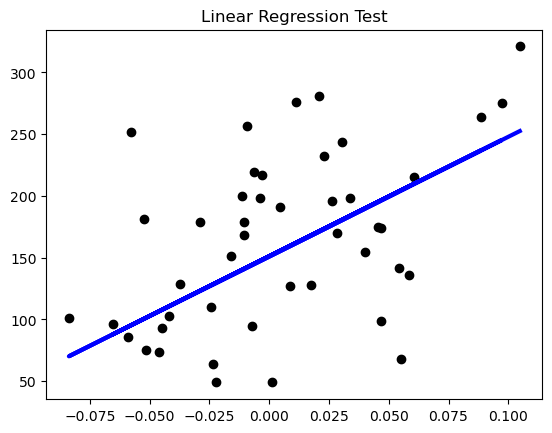

In [32]:
# Prediction: Using only the test data
# use X_test and y test only

y_pred = W*X_test + b
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Test")
plt.show()

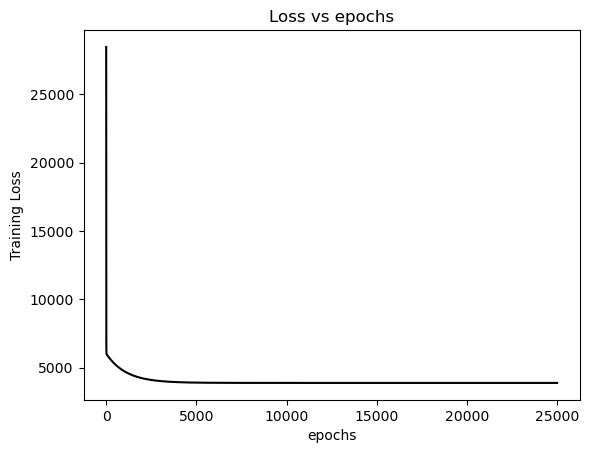

In [33]:
# Display the loss at every epoch (sum of squares error on your training data)
plt.plot(np.arange(epochs), train_loss,  color='black')
plt.title("Loss vs epochs")
plt.xlabel("epochs")
plt.ylabel("Training Loss")
plt.show()

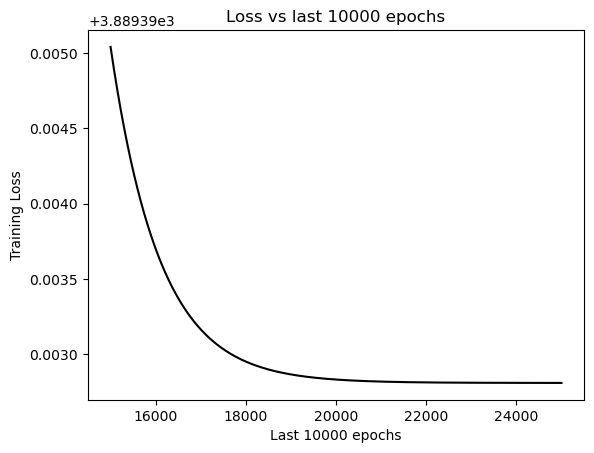

In [34]:
# Display the same, but only for last 10000 epochs
plt.plot(np.arange(epochs)[15000:], train_loss[15000:],  color='black')
plt.title("Loss vs last 10000 epochs")
plt.xlabel("Last 10000 epochs")
plt.ylabel("Training Loss")
plt.show()